# Classification and Clustering

Use sklearn.datasets iris flower dataset to train your model using logistic regression. You need to figure out the accuracy of your model and use that to predict different samples in your test dataset. In iris dataset there are 150 samples containing following features,

Sepal Length
Sepal Width
Petal length
Petal width
Using above 4 features you will classify a flower in one of the three categories,

Setosa
Versicolour
Virginica
Download the iris dataset directly from sklearn.dataset

Use the same data for different clustering(exclude target variable) and classification algorithm

In [86]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [87]:
from sklearn import datasets

iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [88]:
x = iris.data
y = iris.target

## Classification

### Logistic Regression

#### Model Implementation

In [89]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [91]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [92]:
lr.fit(x_train, y_train)

LogisticRegression()

In [93]:
predicted_test=lr.predict(x_test)
predicted_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

#### Confusion Matrix

In [94]:
from sklearn.metrics import confusion_matrix
cmlr = confusion_matrix(y_test, predicted_test)
cmlr

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

Text(33.22222222222222, 0.5, 'True Value')

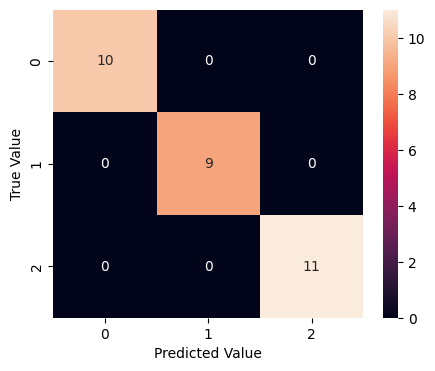

In [96]:
plt.figure(figsize = (5,4))
sns.heatmap(cmlr, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')

In [97]:
#True Positive
TP = np.diag(cmlr)

# True Negatives (TN)
TN = np.sum(cmlr) - (np.sum(cmlr, axis=0) + np.sum(cmlr, axis=1) - TP)

# False Positives (FP)
FP = np.sum(cmlr, axis=0) - TP

# False Negatives (FN)
FN = np.sum(cmlr, axis=1) - TP

# Accuracy
accuracy = (TP + TN) / np.sum(cmlr)

# Precision
precision = TP / (TP + FP)

# Recall
recall = TP / (TP + FN)

# Specificity
specificity = TN / (TN + FP)

# F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)

# False Positive Rate
false_positive_rate = FP / (FP + TN)

# False Negative Rate
false_negative_rate = FN / (FN + TP)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1_score)
print("False Positive Rate:", false_positive_rate)
print("False Negative Rate:", false_negative_rate)

Accuracy: [1. 1. 1.]
Precision: [1. 1. 1.]
Recall: [1. 1. 1.]
Specificity: [1. 1. 1.]
F1 Score: [1. 1. 1.]
False Positive Rate: [0. 0. 0.]
False Negative Rate: [0. 0. 0.]


#### Accuracy

In [98]:
from sklearn.metrics import accuracy_score

Accuracy = accuracy_score(y_test, predicted_test)
Accuracy

1.0

#### Classification Report

In [102]:
from sklearn.metrics import classification_report
print(classification_report(predicted_test,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



##### Accuracy value is 1 which implies it is an ideal model.
##### Precision value is 1 indicating all true predictions are correct
##### Recall value is 1 indicating all positives are correctly predicted
##### Specificity value is 1 indicating all negatives are correctly predicted
##### F1 score value is 1 indicating a perfect balance between precision and recall
##### FP rate values are 0 indicating no negatives are falsely identified as positive
##### FN rate values are 0 indicating no positives are falsely identified as negative

### Decision Tree

#### Model Implementation

In [105]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [106]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [107]:
predicted_testdt=dt.predict(x_test)
predicted_testdt

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

#### Model Evaluation

In [112]:
from sklearn.metrics import confusion_matrix
cmdt = confusion_matrix(y_test, predicted_testdt)
cmdt

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

Text(33.22222222222222, 0.5, 'True Value')

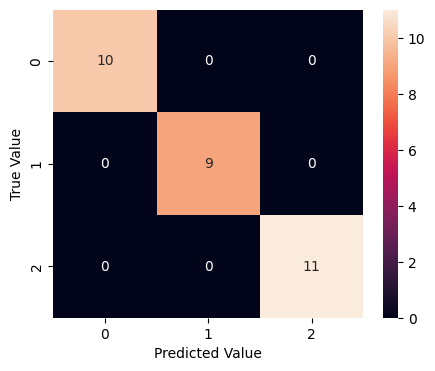

In [113]:
plt.figure(figsize = (5,4))
sns.heatmap(cmdt, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')

In [111]:
#True Positive
TP = np.diag(cmdt)

# True Negatives (TN)
TN = np.sum(cmdt) - (np.sum(cmdt, axis=0) + np.sum(cmdt, axis=1) - TP)

# False Positives (FP)
FP = np.sum(cmdt, axis=0) - TP

# False Negatives (FN)
FN = np.sum(cmdt, axis=1) - TP

# Accuracy
accuracy = (TP + TN) / np.sum(cmdt)

# Precision
precision = TP / (TP + FP)

# Recall
recall = TP / (TP + FN)

# Specificity
specificity = TN / (TN + FP)

# F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)

# False Positive Rate
false_positive_rate = FP / (FP + TN)

# False Negative Rate
false_negative_rate = FN / (FN + TP)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1_score)
print("False Positive Rate:", false_positive_rate)
print("False Negative Rate:", false_negative_rate)

Accuracy: [1. 1. 1.]
Precision: [1. 1. 1.]
Recall: [1. 1. 1.]
Specificity: [1. 1. 1.]
F1 Score: [1. 1. 1.]
False Positive Rate: [0. 0. 0.]
False Negative Rate: [0. 0. 0.]


#### Accuracy

In [115]:
from sklearn.metrics import accuracy_score

Accuracy = accuracy_score(y_test, predicted_testdt)
Accuracy

1.0

#### Classification Report

In [127]:
from sklearn.metrics import classification_report
print(classification_report(predicted_testdt,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



##### Accuracy value is 1 which implies it is an ideal model.
##### Precision value is 1 indicating all true predictions are correct
##### Recall value is 1 indicating all positives are correctly predicted
##### Specificity value is 1 indicating all negatives are correctly predicted
##### F1 score value is 1 indicating a perfect balance between precision and recall
##### FP rate values are 0 indicating no negatives are falsely identified as positive
##### FN rate values are 0 indicating no positives are falsely identified as negative

### Random Forest

#### Model Implementation

In [119]:
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [129]:
predicted_testrf=rf.predict(x_test)
predicted_testrf

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

#### Model Evaluation

In [130]:
from sklearn.metrics import confusion_matrix
cmrf = confusion_matrix(y_test, predicted_testrf)
cmrf

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

Text(33.22222222222222, 0.5, 'True Value')

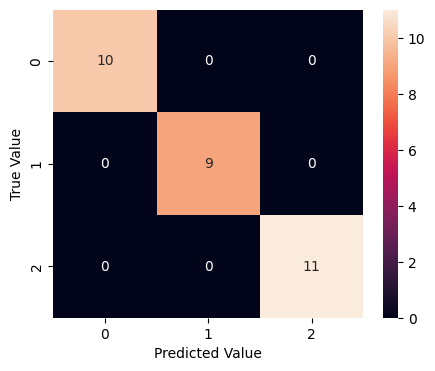

In [131]:
plt.figure(figsize = (5,4))
sns.heatmap(cmrf, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')

In [132]:
#True Positive
TP = np.diag(cmrf)

# True Negatives (TN)
TN = np.sum(cmrf) - (np.sum(cmrf, axis=0) + np.sum(cmrf, axis=1) - TP)

# False Positives (FP)
FP = np.sum(cmrf, axis=0) - TP

# False Negatives (FN)
FN = np.sum(cmrf, axis=1) - TP

# Accuracy
accuracy = (TP + TN) / np.sum(cmrf)

# Precision
precision = TP / (TP + FP)

# Recall
recall = TP / (TP + FN)

# Specificity
specificity = TN / (TN + FP)

# F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)

# False Positive Rate
false_positive_rate = FP / (FP + TN)

# False Negative Rate
false_negative_rate = FN / (FN + TP)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1_score)
print("False Positive Rate:", false_positive_rate)
print("False Negative Rate:", false_negative_rate)

Accuracy: [1. 1. 1.]
Precision: [1. 1. 1.]
Recall: [1. 1. 1.]
Specificity: [1. 1. 1.]
F1 Score: [1. 1. 1.]
False Positive Rate: [0. 0. 0.]
False Negative Rate: [0. 0. 0.]


#### Accuracy

In [133]:
from sklearn.metrics import accuracy_score

Accuracy = accuracy_score(y_test, predicted_testrf)
Accuracy

1.0

#### Classification Report

In [134]:
from sklearn.metrics import classification_report
print(classification_report(predicted_testrf,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



##### Accuracy value is 1 which implies it is an ideal model.
##### Precision value is 1 indicating all true predictions are correct
##### Recall value is 1 indicating all positives are correctly predicted
##### Specificity value is 1 indicating all negatives are correctly predicted
##### F1 score value is 1 indicating a perfect balance between precision and recall
##### FP rate values are 0 indicating no negatives are falsely identified as positive
##### FN rate values are 0 indicating no positives are falsely identified as negative

### Gradient Boosting

#### Model Implementation

In [128]:
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [135]:
predicted_testgb=gb.predict(x_test)
predicted_testgb

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

#### Model Evaluation

In [136]:
from sklearn.metrics import confusion_matrix
cmgb = confusion_matrix(y_test, predicted_testgb)
cmgb

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

Text(33.22222222222222, 0.5, 'True Value')

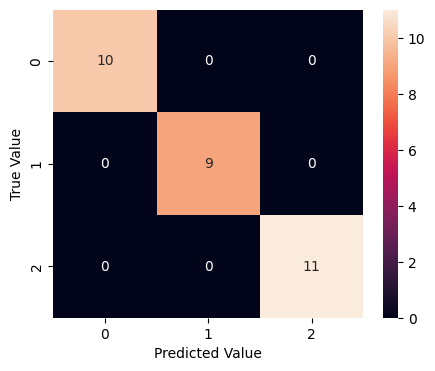

In [137]:
plt.figure(figsize = (5,4))
sns.heatmap(cmgb, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')

In [138]:
#True Positive
TP = np.diag(cmgb)

# True Negatives (TN)
TN = np.sum(cmgb) - (np.sum(cmgb, axis=0) + np.sum(cmgb, axis=1) - TP)

# False Positives (FP)
FP = np.sum(cmgb, axis=0) - TP

# False Negatives (FN)
FN = np.sum(cmgb, axis=1) - TP

# Accuracy
accuracy = (TP + TN) / np.sum(cmgb)

# Precision
precision = TP / (TP + FP)

# Recall
recall = TP / (TP + FN)

# Specificity
specificity = TN / (TN + FP)

# F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)

# False Positive Rate
false_positive_rate = FP / (FP + TN)

# False Negative Rate
false_negative_rate = FN / (FN + TP)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1_score)
print("False Positive Rate:", false_positive_rate)
print("False Negative Rate:", false_negative_rate)

Accuracy: [1. 1. 1.]
Precision: [1. 1. 1.]
Recall: [1. 1. 1.]
Specificity: [1. 1. 1.]
F1 Score: [1. 1. 1.]
False Positive Rate: [0. 0. 0.]
False Negative Rate: [0. 0. 0.]


#### Accuracy

In [139]:
from sklearn.metrics import accuracy_score

Accuracy = accuracy_score(y_test, predicted_testgb)
Accuracy

1.0

#### Classification Report

In [140]:
from sklearn.metrics import classification_report
print(classification_report(predicted_testgb,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



##### Accuracy value is 1 which implies it is an ideal model.
##### Precision value is 1 indicating all true predictions are correct
##### Recall value is 1 indicating all positives are correctly predicted
##### Specificity value is 1 indicating all negatives are correctly predicted
##### F1 score value is 1 indicating a perfect balance between precision and recall
##### FP rate values are 0 indicating no negatives are falsely identified as positive
##### FN rate values are 0 indicating no positives are falsely identified as negative

### Support Vector Classification

#### Model Implementation

In [141]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [142]:
predicted_testsvc=svc.predict(x_test)
predicted_testsvc

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

#### Model Evaluation

In [143]:
from sklearn.metrics import confusion_matrix
cmsvc = confusion_matrix(y_test, predicted_testsvc)
cmsvc

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

Text(33.22222222222222, 0.5, 'True Value')

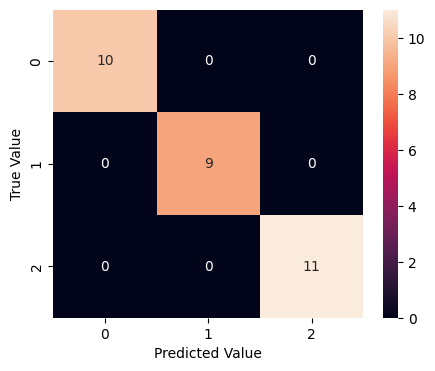

In [144]:
plt.figure(figsize = (5,4))
sns.heatmap(cmsvc, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')

In [145]:
#True Positive
TP = np.diag(cmsvc)

# True Negatives (TN)
TN = np.sum(cmsvc) - (np.sum(cmsvc, axis=0) + np.sum(cmsvc, axis=1) - TP)

# False Positives (FP)
FP = np.sum(cmsvc, axis=0) - TP

# False Negatives (FN)
FN = np.sum(cmsvc, axis=1) - TP

# Accuracy
accuracy = (TP + TN) / np.sum(cmsvc)

# Precision
precision = TP / (TP + FP)

# Recall
recall = TP / (TP + FN)

# Specificity
specificity = TN / (TN + FP)

# F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)

# False Positive Rate
false_positive_rate = FP / (FP + TN)

# False Negative Rate
false_negative_rate = FN / (FN + TP)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1_score)
print("False Positive Rate:", false_positive_rate)
print("False Negative Rate:", false_negative_rate)

Accuracy: [1. 1. 1.]
Precision: [1. 1. 1.]
Recall: [1. 1. 1.]
Specificity: [1. 1. 1.]
F1 Score: [1. 1. 1.]
False Positive Rate: [0. 0. 0.]
False Negative Rate: [0. 0. 0.]


#### Accuracy

In [146]:
from sklearn.metrics import accuracy_score

Accuracy = accuracy_score(y_test, predicted_testsvc)
Accuracy

1.0

#### Classification Report

In [147]:
from sklearn.metrics import classification_report
print(classification_report(predicted_testsvc,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



##### Accuracy value is 1 which implies it is an ideal model.
##### Precision value is 1 indicating all true predictions are correct
##### Recall value is 1 indicating all positives are correctly predicted
##### Specificity value is 1 indicating all negatives are correctly predicted
##### F1 score value is 1 indicating a perfect balance between precision and recall
##### FP rate values are 0 indicating no negatives are falsely identified as positive
##### FN rate values are 0 indicating no positives are falsely identified as negative

## Clustering

In [25]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [26]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [27]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [21]:
from sklearn.cluster import KMeans 

kmeans = KMeans(n_clusters = 3, random_state = 42)

In [22]:
kmeans.fit(df[features])

KMeans(n_clusters=3, random_state=42)

In [23]:
predicted_test = kmeans.predict(df[features])
predicted_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [24]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [28]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
can we copy paste multiple lines  in jupyter notebook


### Elbow Method

In [33]:
from sklearn.cluster import KMeans
X=df.iloc[:,[0,1,2,3]].values

k_range=range(1,10)
sse=[] #sum of squared error

for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)
sse

[681.3706,
 152.3479517603579,
 78.85566582597731,
 57.38387326549494,
 50.95430147058824,
 39.03998724608726,
 40.60189845938376,
 30.1865551948052,
 31.64963030906143]

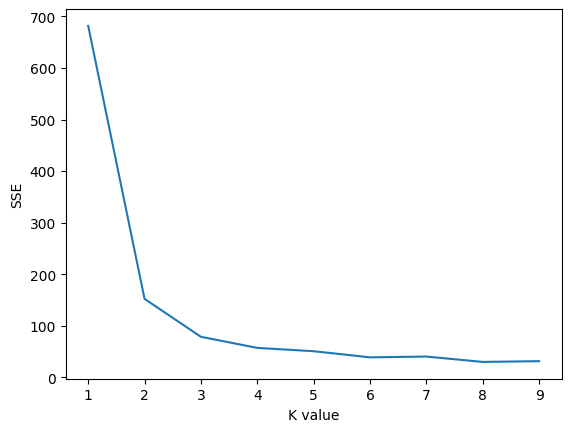

In [34]:
#Now plotting the Optimization value on the graph to check which value is perfect for our classification
plt.xlabel("K value")
plt.ylabel("SSE")
plt.plot(k_range, sse)

From the plot we can identify that the k=3 from where the decrease is gradual.

In [82]:
km = KMeans(n_clusters=3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_predicted = km.fit_predict(X)
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

Training the model by using k value is 3

In [83]:
km.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

Checking centroid of the model.

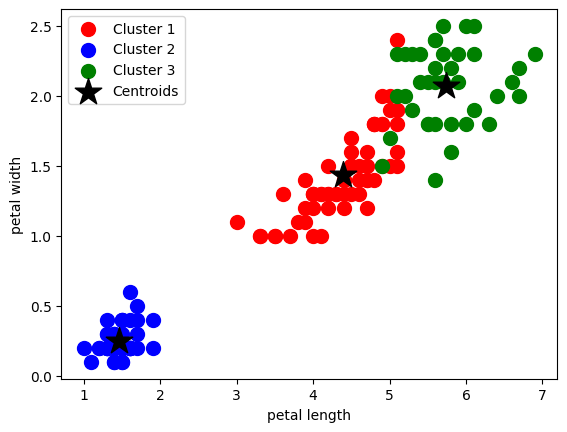

In [84]:
plt.scatter(X[y_predicted == 0, 2], X[y_predicted == 0, 3], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_predicted == 1, 2], X[y_predicted == 1, 3], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_predicted == 2, 2], X[y_predicted == 2, 3], s = 100, c = 'green', label = 'Cluster 3')

plt.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:,3], s = 400, marker="*" ,c = 'black', label = 'Centroids')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()


Visualising the clusters - On the basis of sepal length vs sepal width

### Silhouette Coefficient

In [58]:
from sklearn.metrics import silhouette_score

X=df.iloc[:,[0,1,2,3]].values

silhouette_scores = []

# Try k values from 2 to 10
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
silhouette_scores

[0.6810461692117462,
 0.551191604619592,
 0.49764331793219224,
 0.4930804067193521,
 0.36784649847122436,
 0.3542978877198849,
 0.34467972180561923,
 0.31558878533897633,
 0.3014143745325133]

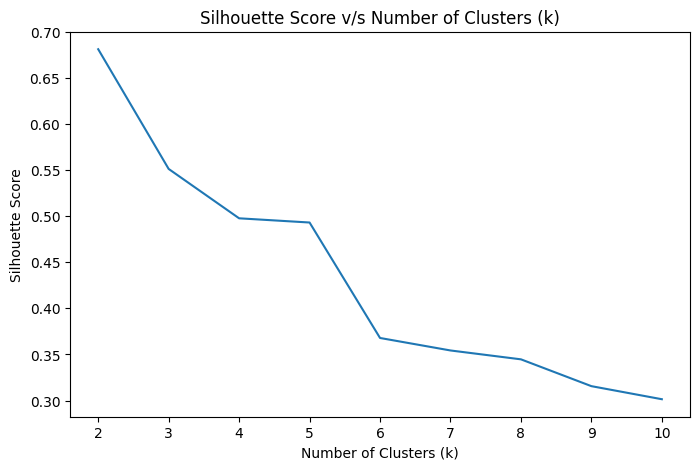

In [61]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores)
plt.title('Silhouette Score v/s Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.show()km = KMeans(n_clusters=3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_predicted = km.fit_predict(X)
y_predicted

Optimal k value is 2 here as the highest silhouette score is found at k=2

In [68]:
kms = KMeans(n_clusters=2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
sy_predicted = kms.fit_predict(X)
sy_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Training the model by using k value is 3

In [69]:
kms.cluster_centers_

array([[5.00566038, 3.36981132, 1.56037736, 0.29056604],
       [6.30103093, 2.88659794, 4.95876289, 1.69587629]])

Checking centroid of the model.

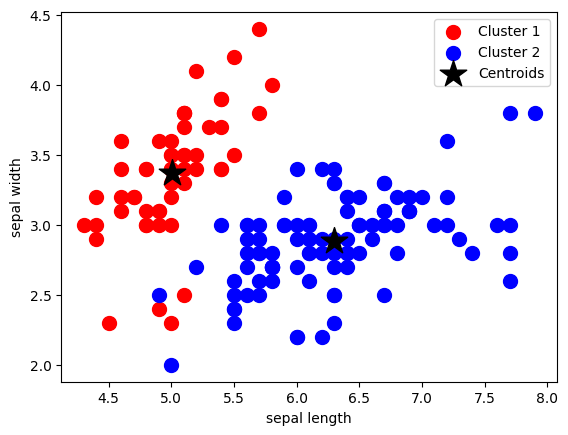

In [73]:
plt.scatter(X[sy_predicted == 0, 0], X[sy_predicted == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[sy_predicted == 1, 0], X[sy_predicted == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(kms.cluster_centers_[:, 0], kms.cluster_centers_[:,1], s = 400, marker="*" ,c = 'black', label = 'Centroids')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

Visualising the clusters - On the basis of sepal length vs sepal width